# Data Loading

## Data loading with Pandas
Load `adult` dataset using Pandas.

In [1]:
import pandas as pd
df1 = pd.read_csv('adult.csv', index_col=0)

In [2]:
df1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Simple analysis
- Check the shape of the dataset, 
- list the column names count number of unique values in `income` column, 
- plot the histogram of age grouped by income

In [3]:
df1.shape

(32561, 14)

In [4]:
df1.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [5]:
df1['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
# list top 10 countries with most high income residents
df1.groupby('native-country')['income'].apply(lambda x: (x == ' >50K').sum()).sort_values(ascending=False).head(10)

native-country
United-States    7171
?                 146
Philippines        61
Germany            44
India              40
Canada             39
Mexico             33
England            30
Italy              25
Cuba               25
Name: income, dtype: int64

income
<=50K    Axes(0.125,0.11;0.775x0.77)
>50K     Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

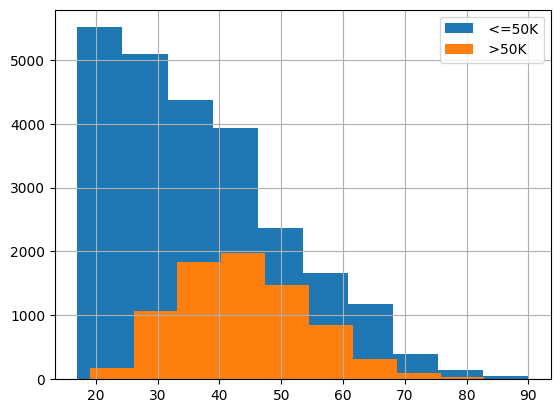

In [7]:
df1.groupby('income').age.hist(legend=True)

# Splitting into training and test data

# Exercise I 
Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [8]:
df1.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [9]:
df2 = pd.read_csv('boston_house_prices.csv')

In [10]:
df2.shape

(506, 14)

In [11]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
y = df2['MEDV']
X = df2.drop('MEDV', axis=1)

Text(0.5, 0, 'CRIM')

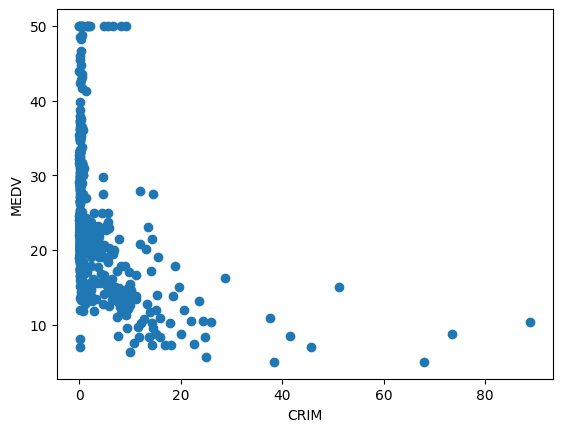

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df2['CRIM'], df2['MEDV'])
plt.ylabel('MEDV')
plt.xlabel('CRIM')

In [14]:
df2[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [15]:
import numpy
print(numpy.__version__)

2.0.2


## Load Datasets from ScikitLearn
Load digits dataset from sklearn

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 2.0.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
X_train.shape

In [ ]:
X.shape

In [ ]:
100*X_train.shape[0]/X.shape[0]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_train_hat = lr.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_train_hat)

In [ ]:
y_train.shape[0]

In [ ]:
def mse(y, yhat):
    n = y.shape[0]
    se = (y - yhat)**2
    return se.sum()/n

In [ ]:
mse(y_train, y_train_hat)

NameError: name 'mse' is not defined

In [ ]:
lr.predict(X_train)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
X_test

In [ ]:
type(X_test)

In [ ]:
import numpy as np
Xnew = X_test.iloc[0,:]
Xnew.shape
Xnew = np.array(X_new).reshape(1, X_new.shape[0])

In [ ]:
X_train.columns

In [ ]:
lr.predict(Xnew)

# Exercise II

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.
